# Goal
* develop tests

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
from torch import tensor
from compSPI import transforms
import torch
from torch import tensor

In [2]:
from importlib import reload
from simSPI import geometric_micelle
import math
reload(geometric_micelle)

<module 'simSPI.geometric_micelle' from '/Users/gw/repos/helena-fork/simSPI/simSPI/geometric_micelle.py'>

# Projected ellipsoid

See ellipse_project for how to work out the formula for a projected ellipsoid

In [3]:
scale_ = 4
scale=20*scale_
a=5*scale
b=1*scale
c=5*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))
axis = np.array([0,0,1])
deg=20
angle = np.deg2rad(deg)
r = torch.from_numpy(Rotation.from_rotvec(angle*axis).as_matrix())

shift_x, shift_y = 70, 100
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh+shift_x,y_mesh+shift_y,a,b,c,r)


Text(0.5, 1.0, 'Rotated about [0 0 1] by 20 deg\n a=400,b=80,c=400')

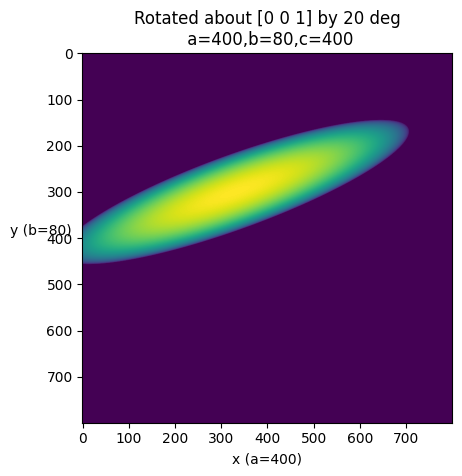

In [4]:
plt.imshow(proj_ellipsoid)
plt.xlabel(f'x (a={a})')
plt.ylabel(f'y (b={b})',rotation=0)
plt.title(f'Rotated about {axis} by {deg} deg\n a={a},b={b},c={c}')

Note that shifting the object does not mirror the density off the grid - it just dissapears

We can check this visually, and also against the analytic fomula for an ellipsoid: $V = \frac{4}{3} \pi a b c$.

In [5]:
analytic_vol_ellipsoid = 4/3*np.pi*a*b*c

volume = proj_ellipsoid.sum()

rel_error = np.abs(analytic_vol_ellipsoid - proj_ellipsoid.sum()) / analytic_vol_ellipsoid
rel_error

tensor(0.0109, dtype=torch.float64)

This is used for the test: `tests.test_geometric_micelle.projected_rotated_ellipsoid`

In [6]:
import tests.test_geometric_micelle
tests.test_geometric_micelle.test_project_rotated_ellipsoid()

In [7]:
import inspect
src_str = inspect.getsource(tests.test_geometric_micelle.test_project_rotated_ellipsoid)
print(src_str)


def test_project_rotated_ellipsoid():
  '''
  test that projecting then summing is the same as the analytical formula.
  errors arise from discretiziation on 2D array mesh, so set atol to test close enough
  '''

  scale = 5
  a = 3 * scale
  b = 2 * scale
  c = 1 * scale
  step_x = step_y = 1
  max_axis = max(a, b)
  y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis, max_axis, step=step_x), torch.arange(-max_axis, max_axis, step=step_y))
  axis = tensor([0, 0, 1]).float()
  deg = 45
  angle = np.deg2rad(deg)
  rotations = torch.from_numpy(Rotation.from_rotvec(angle * axis).as_matrix())

  proj_ellipsoid = project_rotated_ellipsoid(x_mesh, y_mesh, a, b, c, rotations)
  volume = proj_ellipsoid.sum()

  analytic_vol_ellipsoid = 4 / 3 * math.pi * a * b * c
  rel_error = torch.abs(analytic_vol_ellipsoid - volume) / analytic_vol_ellipsoid

  assert np.isclose(rel_error, 0, atol=1e-3)



# Micelle structure from head and tail region of detergent
We can compose these to define regions of a micelle from the structure of a detergent (e.g. hydrophilic head group, hydrophobic tails). Note that this may be suitable or unsutiable, depending on the type of detergent

In [8]:
def inner_outer_proj(a,b,c,r,inner_shell_ratio=0.8,shell_density_ratio=1):
    proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,r)
    proj_ellipsoid_inner = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,
                                                                   a*inner_shell_ratio,
                                                                   b*inner_shell_ratio,
                                                                   c*inner_shell_ratio,
                                                                   r)

    shell = proj_ellipsoid-proj_ellipsoid_inner
    micelle = shell_density_ratio*shell + proj_ellipsoid_inner
    return micelle


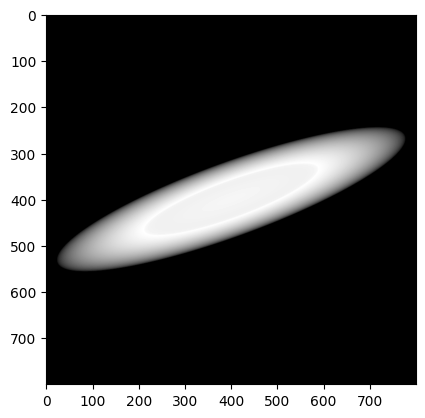

In [9]:
micelle = inner_outer_proj(a,b,c,r,inner_shell_ratio=0.5,shell_density_ratio=1.5)
plt.imshow(micelle,cmap='gray')

We can see a sharp ring at the boundary between the inner and outer ellipsoids

# Cavity
remove projected rotated cylindar

In [10]:
import tests.test_geometric_micelle
tests.test_geometric_micelle.test_project_rotated_cylinder()

else
else
else
else
about z-axis
about z-axis
90 deg, line along x-axis
90 deg, line along x-axis
90 deg, line along y-axis
90 deg, line along y-axis
90 deg, line along y-axis with z-tilt
90 deg, line along y-axis with z-tilt
90 deg, line along x-axis with z-tilt
90 deg, line along x-axis with z-tilt


In [11]:
scale=5
a=5*scale
b=1*scale
c=5*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))

else
else
else
else


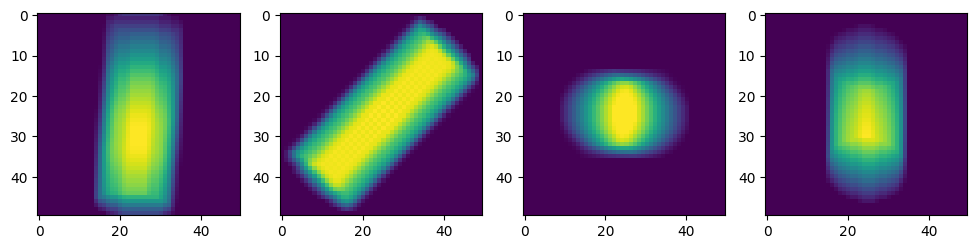

In [12]:
n_plots = 4
scale=1
np.random.seed(1)
fig,axes = plt.subplots(ncols=n_plots,figsize=(3*n_plots,3))
for idx, rotation in enumerate(torch.from_numpy(Rotation.random(num=n_plots).as_matrix())):
    proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                               y_mesh,
                                                               radius_circle=scale*10,
                                                               h=scale*50,
                                                               rotation=rotation)
    axes[idx].imshow(proj_cylinder)

In [13]:
scale_ = 8
scale=5*scale_
a=5*scale
b=1*scale
c=5*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))

else
else
else
else


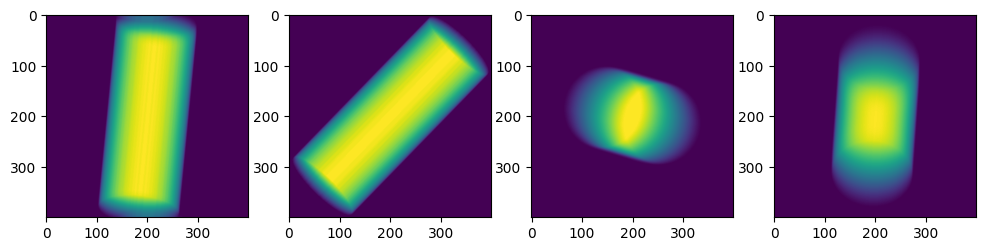

In [14]:
n_plots = 4
scale=scale_
np.random.seed(1)
fig,axes = plt.subplots(ncols=n_plots,figsize=(3*n_plots,3))
for idx, rotation in enumerate(torch.from_numpy(Rotation.random(num=n_plots).as_matrix())):
    proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,y_mesh,radius_circle=scale*10,h=scale*50,rotation=rotation)
    axes[idx].imshow(proj_cylinder)

We can see the artefacts dissapear as we up sample.

To a certain extend, these artefacts go away when we downsample after through Fourier cropping. Thus we can first upsample, and then down sample in Fourier space.

else
else
else
else


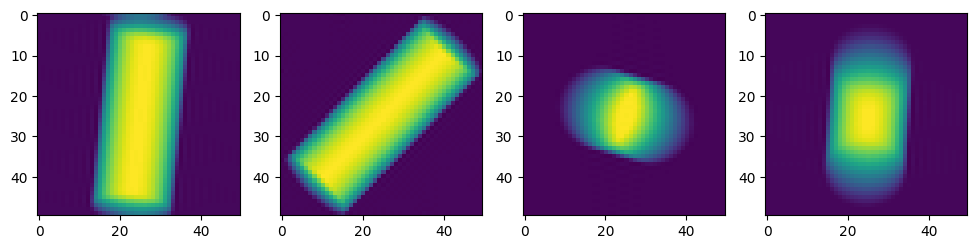

In [15]:
n_plots = 4
scale=scale_
np.random.seed(1)
fig,axes = plt.subplots(ncols=n_plots,figsize=(3*n_plots,3))
for idx, rotation in enumerate(torch.from_numpy(Rotation.random(num=n_plots).as_matrix())):
    n_full = x_mesh.shape[0]
    n_crop = n_full // scale
    proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                               y_mesh,
                                                               radius_circle=scale*10,
                                                               h=scale*50,
                                                               rotation=rotation,
                                                               n_crop=n_crop)  
    axes[idx].imshow(proj_cylinder)

## subracting out cavity inside micelle
* the convention is that the cylinder is aligned with the z-axis with id rotation


### top down micelle

Text(0.5, 1.0, 'Ellipsoid: a=256 | b=204.8 | c=64.0')

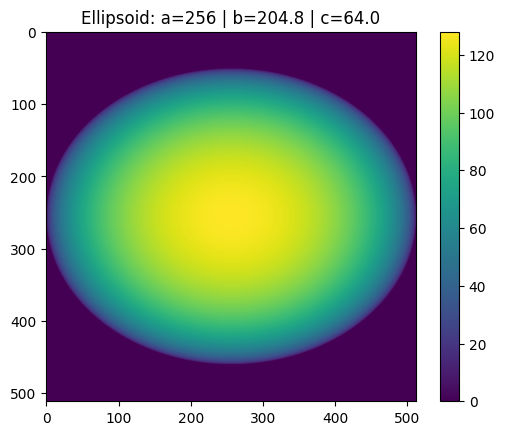

In [16]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))
rotation = torch.eye(3)
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,rotation)

ax = plt.imshow(proj_ellipsoid)
plt.colorbar(ax)
plt.title(f'Ellipsoid: a={a} | b={b} | c={c}')

about z-axis


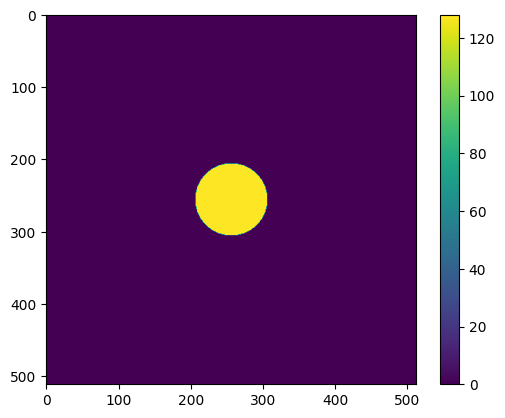

In [17]:
radius_circle = 50
h = c*2
proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                               y_mesh,
                                                               radius_circle=radius_circle,
                                                               h=h,
                                                               rotation=rotation)
ax = plt.imshow(proj_cylinder)
plt.colorbar(ax)

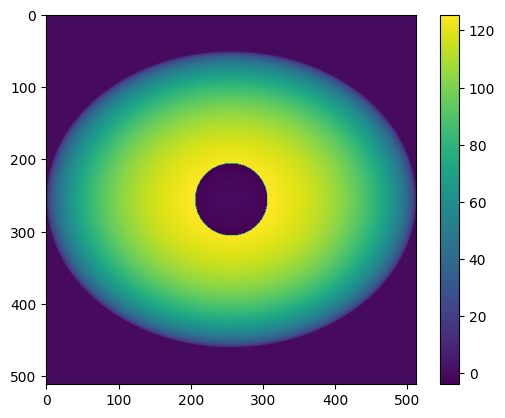

In [18]:
micelle = proj_ellipsoid - proj_cylinder

ax = plt.imshow(micelle)
plt.colorbar(ax)

c in the ellipsoid is 32, so the max value is 32. If 

The height of the cylinder is 32 so the intensity is $2 \cdot 32 = 64$.

If we subtract them we get a hole with zero density at the top, and a bit of negative density in the edges (from subtracting too much off)

### Side view micelle

Text(0.5, 1.0, 'Ellipsoid: a=256 | b=204.8 | c=64.0')

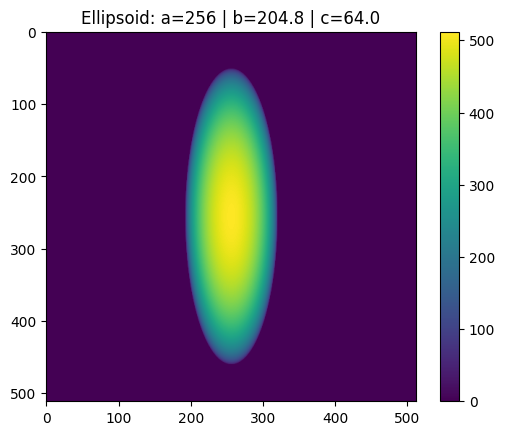

In [19]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))
rotation = torch.from_numpy(Rotation.from_euler('XZY',[0,0,90],degrees=True).as_matrix())
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,rotation)

ax = plt.imshow(proj_ellipsoid)
plt.colorbar(ax)
plt.title(f'Ellipsoid: a={a} | b={b} | c={c}')

90 deg, line along x-axis


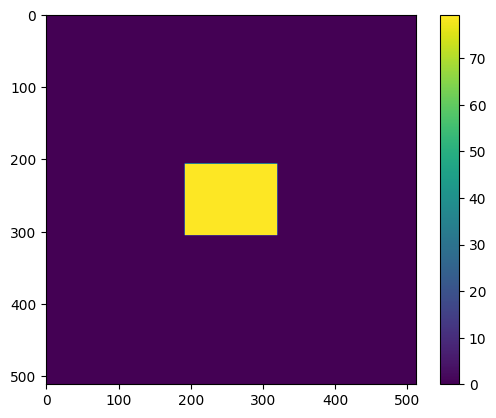

In [20]:

radius_circle = 50
h = c*2
volume = np.pi*radius_circle**2*h
proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                               y_mesh,
                                                               radius_circle=radius_circle,
                                                               h=h,
                                                               rotation=rotation)
proj_cylinder = volume*proj_cylinder / proj_cylinder.sum()
ax = plt.imshow(proj_cylinder)
plt.colorbar(ax)

The intensity is scaled such that the volume is $\pi r^2 h$

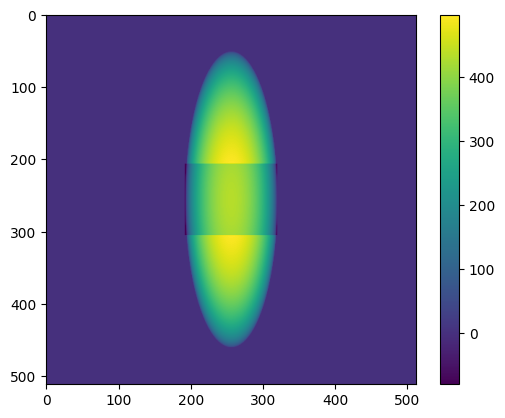

In [21]:
micelle = proj_ellipsoid - proj_cylinder

ax = plt.imshow(micelle)
plt.colorbar(ax)

We see the edges go down to zero, with some artefacts at the top where the cylinder peeks outside the micelle

## Micelle: arbitrary rotation and translation

Text(0.5, 1.0, 'Ellipsoid: a=256 | b=204.8 | c=64.0')

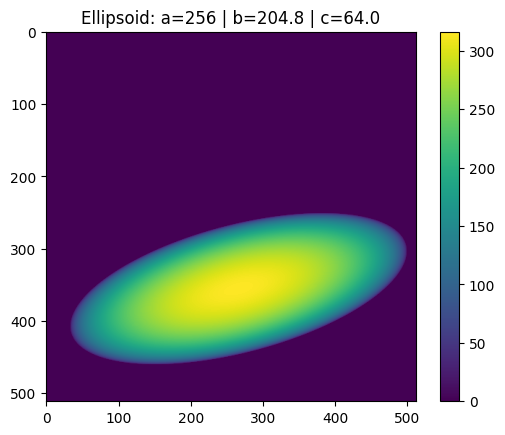

In [51]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))
np.random.seed(0)
rotation = torch.from_numpy(Rotation.random().as_matrix())
shift_x, shift_y = 10, 100
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh-shift_x,y_mesh-shift_y,a,b,c,rotation)

ax = plt.imshow(proj_ellipsoid)
plt.colorbar(ax)
plt.title(f'Ellipsoid: a={a} | b={b} | c={c}')

### shift

else


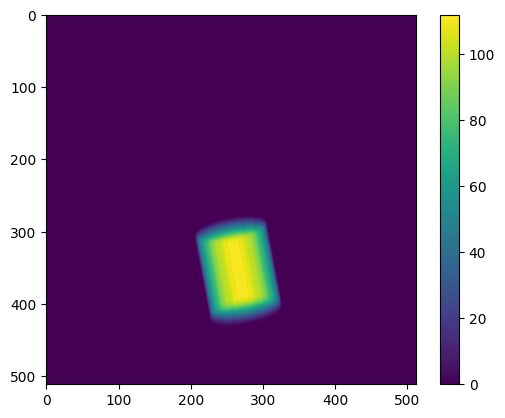

In [52]:
radius_circle = 50
h = c*2
volume = np.pi*radius_circle**2*h
proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                           y_mesh,
                                                           radius_circle=radius_circle,
                                                           h=h,
                                                           rotation=rotation.T,
                                                           shift_x=shift_x,
                                                           shift_y = shift_y)
proj_cylinder = volume*proj_cylinder / proj_cylinder.sum()
ax = plt.imshow(proj_cylinder)
plt.colorbar(ax)

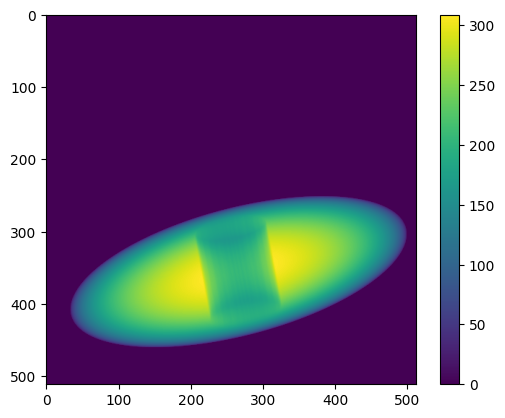

In [53]:
micelle = proj_ellipsoid - proj_cylinder

ax = plt.imshow(micelle)
plt.colorbar(ax)

In [63]:
# for idx, (i, j) in enumerate(zip([1,2,3],[10,20,30])):
#     print(idx, i,j)


array([ 13.60891222,  85.11932766, -85.79278836])

else
else
else


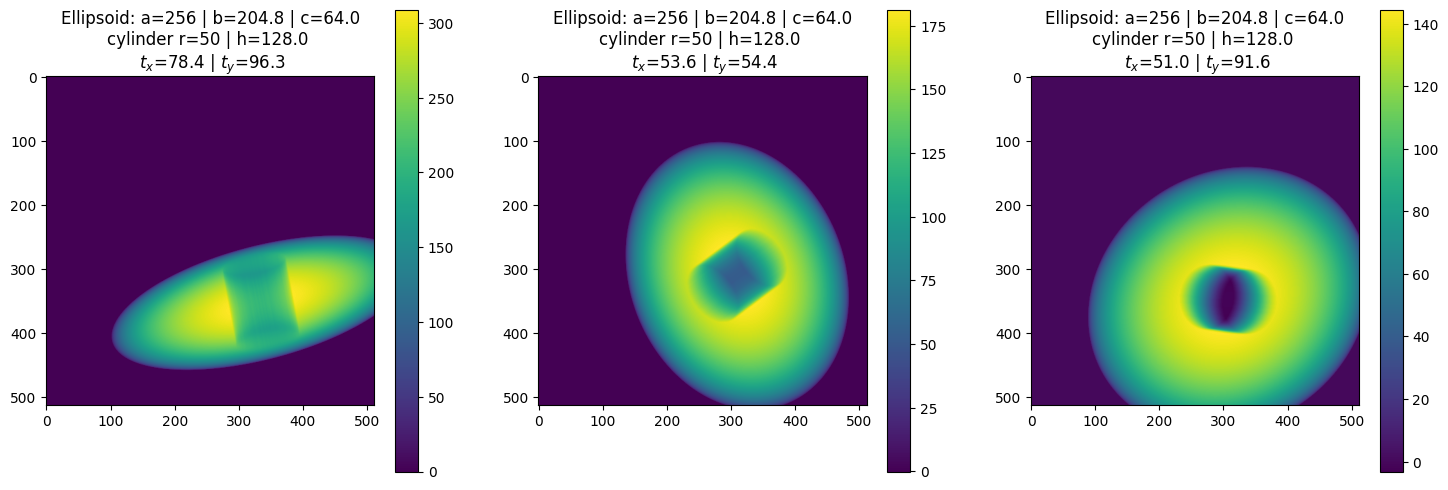

In [5]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))

n_plots = 3
fig, axes = plt.subplots(ncols=n_plots, figsize=(6*n_plots,6))
np.random.seed(0)
for idx, (rotation, (shift_x, shift_y)) in enumerate(zip(
    torch.from_numpy(Rotation.random(num=n_plots).as_matrix()),
    np.random.uniform(low=50,high=100,size=2*n_plots).reshape(n_plots,2)
)):

    proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh-shift_x,y_mesh-shift_y,a,b,c,rotation)

    radius_circle = 50
    h = c*2
    volume = np.pi*radius_circle**2*h
    proj_cylinder = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                               y_mesh,
                                                               radius_circle=radius_circle,
                                                               h=h,
                                                               rotation=rotation.T,
                                                               shift_x=shift_x,
                                                               shift_y=shift_y)
    proj_cylinder = volume*proj_cylinder / proj_cylinder.sum()
    
    micelle = proj_ellipsoid - proj_cylinder
    
    ax = axes[idx].imshow(micelle)
    fig.colorbar(ax,ax=axes[idx])

    axes[idx].set_title(f'Ellipsoid: a={a} | b={b} | c={c}' + '\n' + f'cylinder r={radius_circle} | h={h} \n '+r'$t_x$={:.1f} | $t_y$={:.1f}'.format(shift_x,shift_y))


# Two phase micelle
* arising for example from the difference in contrast from the phydro-philic and -phobic regions of a detergent molecule

else
else


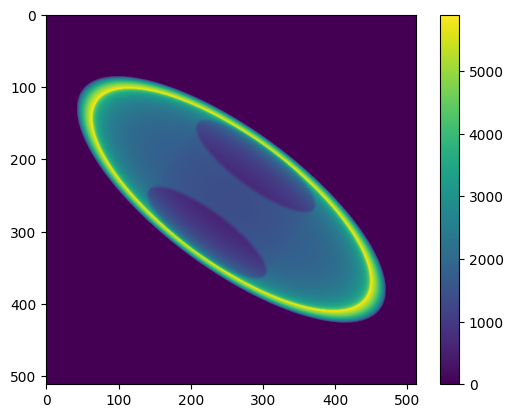

In [7]:
def two_phase_micelle(x_mesh, y_mesh, a, b, c, rotation, radius_circle, inner_shell_ratio, shell_density_ratio, shift_x=0, shift_y=0):
    proj_ellipsoid_outer = geometric_micelle.project_rotated_ellipsoid(x_mesh-shift_x, y_mesh-shift_y, a, b, c, rotation.T)
    assert proj_ellipsoid_outer.sum() > 0
    proj_ellipsoid_inner = geometric_micelle.project_rotated_ellipsoid(x_mesh-shift_x, y_mesh-shift_y,
                                                   a * inner_shell_ratio,
                                                   b * inner_shell_ratio,
                                                   c * inner_shell_ratio,
                                                   rotation.T)
    assert proj_ellipsoid_inner.sum() > 0
    shell = proj_ellipsoid_outer - proj_ellipsoid_inner
    assert shell.sum() > 0

    h_outer = c * 2
    volume_outer = math.pi * radius_circle ** 2 * h_outer
    proj_cylinder_outer = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                 y_mesh,
                                                 radius_circle=radius_circle,
                                                 h=h_outer,
                                                 rotation=rotation,
                                                 shift_x=shift_x,
                                                 shift_y=shift_y,
                                                 )
    assert proj_cylinder_outer.sum() > 0
    proj_cylinder_outer = volume_outer * proj_cylinder_outer / proj_cylinder_outer.sum()

    h_inner = c * inner_shell_ratio * 2
    volume_inner = math.pi * radius_circle ** 2 * h_inner
    proj_cylinder_inner = geometric_micelle.project_rotated_cylinder(x_mesh,
                                                 y_mesh,
                                                 radius_circle=radius_circle,
                                                 h=h_inner,
                                                 rotation=rotation,
                                                 shift_x=shift_x,
                                                 shift_y=shift_y,
                                                 )
    assert proj_cylinder_inner.sum() > 0
    proj_cylinder_inner = volume_inner * proj_cylinder_inner / proj_cylinder_inner.sum()

    proj_cylinder_shell = proj_cylinder_outer - proj_cylinder_inner

    micelle = shell_density_ratio * shell + proj_ellipsoid_inner - (
            shell_density_ratio * proj_cylinder_shell + proj_cylinder_inner)
    assert micelle.sum() > 0
    return micelle


np.random.seed(0)
rotation = torch.from_numpy(Rotation.random().as_matrix())

micelle = two_phase_micelle(x_mesh,y_mesh,a=256,b=256,c=64,
                            rotation=rotation,
                            radius_circle=100,
                            inner_shell_ratio=0.9,
                            shell_density_ratio=40)

ax = plt.imshow(micelle)
plt.colorbar(ax)
    


else
else
else
else
else
else


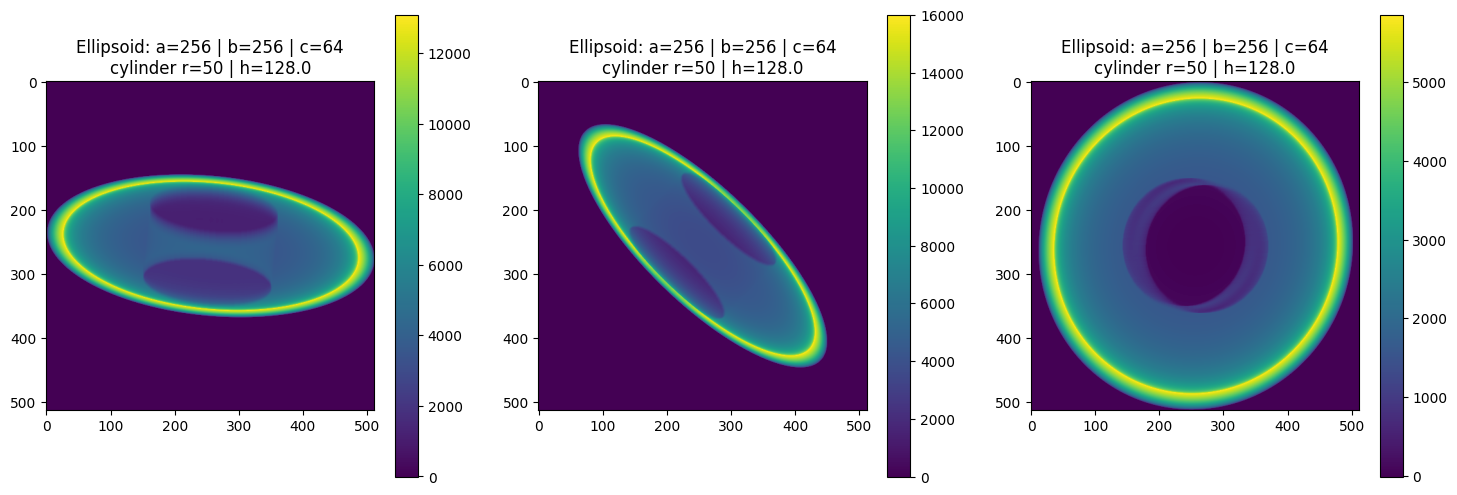

In [8]:
scale=256
a=256
b=256
c=64
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))

n_plots = 3
fig, axes = plt.subplots(ncols=n_plots, figsize=(6*n_plots,6))
np.random.seed(1)
for idx, rotation in enumerate(torch.from_numpy(Rotation.random(num=n_plots).as_matrix())):

    micelle = two_phase_micelle(x_mesh,y_mesh,
                                a=a,
                                b=b,
                                c=c,
                                rotation=rotation,
                                radius_circle=100,
                                inner_shell_ratio=0.9,
                                shell_density_ratio=100)
    
    ax = axes[idx].imshow(micelle)
    fig.colorbar(ax,ax=axes[idx])

    axes[idx].set_title(f'Ellipsoid: a={a} | b={b} | c={c}' + '\n' + f'cylinder r={radius_circle} | h={h}')


# Blurring
This analytical approximatin treats atoms as if they are infinitesimaly small. In reality there are discrete atoms that have a Gaussian-like kernel 

## tests

In [9]:
scale=32
a=8*scale
b=8*scale
c=2*scale
radius_circle=3*scale
step_x = step_y = 1
max_axis = np.max([a,b])
y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))

# same volume
np.random.seed(1)
rotations = torch.from_numpy(Rotation.random(num=n_plots).as_matrix())
 
micelle_1 = geometric_micelle.two_phase_micelle(x_mesh,y_mesh,
                                a=a,
                                b=b,
                                c=c,
                                rotation=rotations[0],
                                radius_circle=radius_circle,
                                inner_shell_ratio=0.9,
                                shell_density_ratio=100)

micelle_2 = geometric_micelle.two_phase_micelle(x_mesh,y_mesh,
                                a=a,
                                b=b,
                                c=c,
                                rotation=rotations[1],
                                radius_circle=radius_circle,
                                inner_shell_ratio=0.9,
                                shell_density_ratio=100)

assert np.isclose(0,(micelle_1 - micelle_2).sum() / (micelle_2+micelle_2).sum(),atol=1e-4)

# volume scales
micelle_vol = []
scales = [16,32]
for idx, scale in enumerate(scales):
    a=8*scale
    b=8*scale
    c=2*scale
    radius_circle=3*scale
    step_x = step_y = 1
    max_axis = np.max([a,b])
    y_mesh, x_mesh = torch.meshgrid(torch.arange(-max_axis,max_axis,step=step_x),torch.arange(-max_axis,max_axis,step=step_y))


    micelle = two_phase_micelle(x_mesh,y_mesh,
                                    a=a,
                                    b=b,
                                    c=c,
                                    rotation=rotations[idx],
                                    radius_circle=radius_circle,
                                    inner_shell_ratio=0.9,
                                    shell_density_ratio=100)

    micelle_vol.append(micelle.sum())
    
volume_factor = (scales[0] / scales[1])**3
assert np.isclose(micelle_vol[0] / micelle_vol[1], volume_factor, atol=1e-3)

else
else
else
else
else
else
else
else


In [94]:
from tests.test_geometric_micelle import test_two_phase_micelle

In [95]:
test_two_phase_micelle()

else
else
else
else
else
else
else
else


# translation
* want to translate the micelle, and then rotate it with the other object. therefore rotating non-centered micelle.
* a translated point which is then rotates transforms as so: $R(r+t) = Rr + Rt$. The orientation of the object does not change, but only its final translation. Thus the projection to the xyplane will just be shifted to $Rt = [R_{xx} t_x + R_{xy} t_y + R_{xz} t_z, R_{xx} t_x + R_{xy} t_y + R_{xz} t_z, R_{xx} t_x + R_{xy} t_y + R_{xz} t_z]^T$, where $t=[t_x,t_y,t_z]$ is how the centre of the object was translated. 

* the line integral over the z-axis does not change from a translation in x, so the final effect for the projection is a shift in the xy plane, which we an do directly (instead of doing an FFT shift)

In [96]:
from simSPI.geometric_micelle import two_phase_micelle
import numpy as np
import torch

else
else


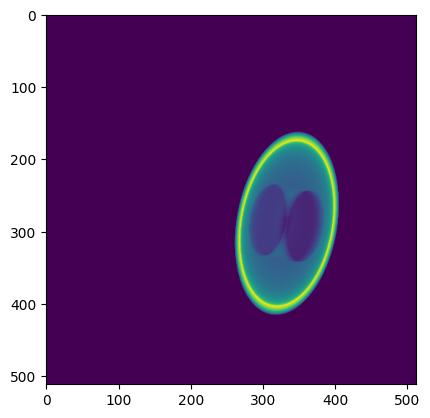

In [22]:
n_pix=512
y_mesh, x_mesh = torch.meshgrid(torch.arange(-n_pix//2,n_pix//2,step=1),torch.arange(-n_pix//2,n_pix//2,step=1))

np.random.seed(0)
rotation = torch.from_numpy(Rotation.from_euler('ZXY',[45,45,45],degrees=True).as_matrix()).float()
translation = tensor([10.,20,100])
shift_x, shift_y, _ = rotation@translation
micelle = two_phase_micelle(x_mesh,y_mesh,a=128,b=128,c=32,
                            rotation=rotation,
                            radius_circle=50,
                            inner_shell_ratio=0.9,
                            shell_density_ratio=40,
                            shift_x=shift_x,
                            shift_y=shift_y)

plt.imshow(micelle)